## Objectives
# The main objective is to use Exploratory Data Analysis (EDA) to identify patterns that indicate whether a person is likely to default on a loan. This information will help the company make better decisions, such as:

# Denying the loan
# Reducing the loan amount
# Lending to risky applicants at a higher interest rate

## Step 1: Loading the Data related to Loans

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
loan_new = pd.read_csv('C:\\Users\\rashmi.bharti\\OneDrive - Brillio\\EDA\\loan.csv')
loan_new.columns

C:\Users\rashmi.bharti\AppData\Local\Temp\ipykernel_38184\2253770479.py:6: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_new = pd.read_csv('C:\\Users\\rashmi.bharti\\OneDrive - Brillio\\EDA\\loan.csv')


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [273]:
loan_new.head

<bound method NDFrame.head of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   
1

In [274]:
loan_new.shape

(39717, 111)

## Step 2: Data Cleaning: Handle missing values, outliers, and inconsistent data entries.

In [275]:
loan_new.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39713,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39714,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39715,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


## A. Filling the Null Values

In [276]:
loan_data = loan_new.fillna(value=0)
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [277]:
loan_data.isnull().sum().sum()

0

In [278]:
loan_new.isnull().sum().sum()

2263364

## B. Detect And Remove the Outliers

In [279]:
loan_data.describe

<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ... 

In [280]:
loan_data.shape

(39717, 111)

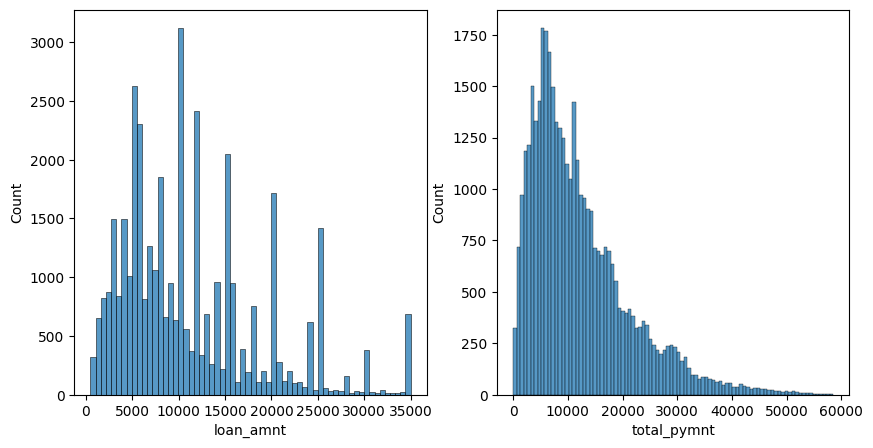

In [281]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(loan_data['loan_amnt'])

plt.subplot(1,2,2)
sns.histplot(loan_data['total_pymnt'])

plt.show()

In [282]:
loan_data['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<Axes: ylabel='loan_amnt'>

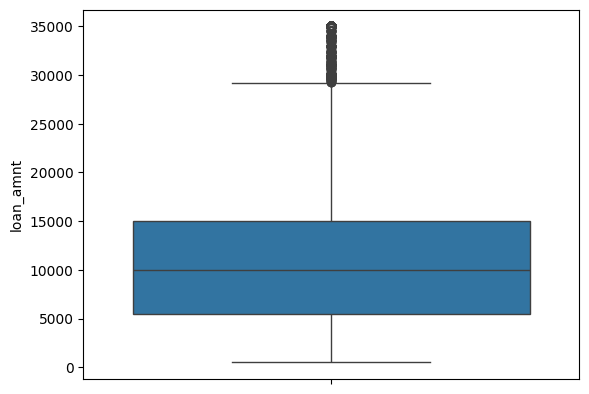

In [283]:
sns.boxplot(loan_data['loan_amnt'])

### Finding the IQR

In [284]:
percentile25= (loan_data['loan_amnt']).quantile(0.25)
percentile75= (loan_data['loan_amnt']).quantile(0.75)
print("percentile25 is::",percentile25)

percentile25 is:: 5500.0


In [285]:
print("percentile75 is::",percentile75)

percentile75 is:: 15000.0


In [286]:
iqr= percentile75 - percentile25
iqr

9500.0

In [287]:
upper_limit= percentile75 + 1.5 * iqr
lower_limit= percentile25 + 1.5 * iqr

In [288]:
print("Upper limit is::",upper_limit)
print("Lower limit is::",lower_limit)

Upper limit is:: 29250.0
Lower limit is:: 19750.0


In [289]:
loan_data[loan_data['loan_amnt'] > upper_limit]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
31,1069539,1304608,31825,31825,31825.00000,36 months,7.90%,995.82,A,A4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,1068994,1303432,35000,22075,22050.00000,60 months,17.27%,551.84,D,D3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,1068159,1302729,35000,35000,35000.00000,36 months,8.90%,1111.37,A,A5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185,1067084,1301459,35000,35000,35000.00000,36 months,10.65%,1140.07,B,B2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209,1066706,1300906,29500,29500,28513.45925,60 months,20.30%,786.51,E,E5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19800,669297,855767,32000,32000,31684.89912,60 months,20.85%,863.01,G,G3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19811,666337,851924,32000,32000,31569.14450,60 months,19.74%,843.19,F,F5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19825,668841,855204,30000,30000,29094.62328,60 months,16.40%,735.94,E,E1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19838,668594,854847,30000,30000,30000.00000,60 months,17.88%,759.85,E,E5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [290]:
loan_new[loan_new['loan_amnt'] < lower_limit]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [291]:
loan_data_new = loan_data[loan_data['loan_amnt'] < upper_limit]

In [292]:
loan_data_new.shape

(38487, 111)

### Compared between Old and New data¶
### Successfully Removed the Outliers, below graph shows the before and after removing the outliers

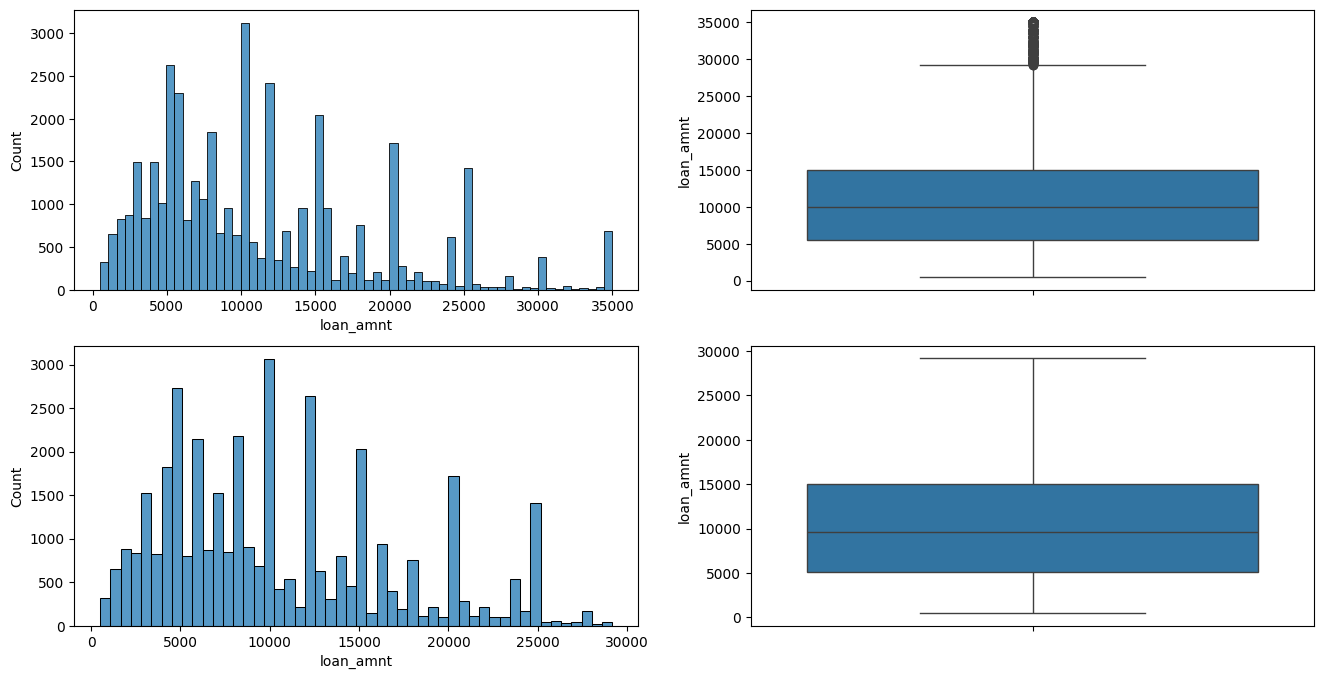

In [293]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(loan_data['loan_amnt'])

plt.subplot(2,2,2)
sns.boxplot(loan_data['loan_amnt'])

plt.subplot(2,2,3)
sns.histplot(loan_data_new['loan_amnt'])

plt.subplot(2,2,4)
sns.boxplot(loan_data_new['loan_amnt'])

plt.show()

# Step 3: Data Exploration: Analyze demographic information, loan attributes, and repayment status.

<Axes: ylabel='loan_amnt'>

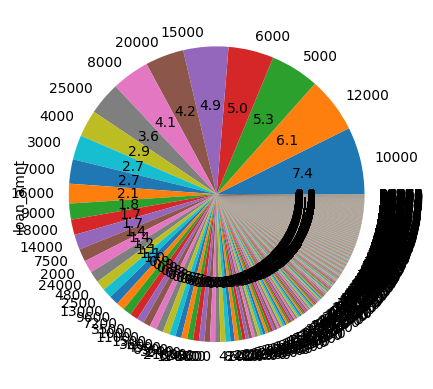

In [294]:
loan_data_new['loan_amnt'].value_counts().plot(kind='pie',autopct='%.1f')

#### In order to manage the data well, we can drop the "Current" rows from the "Loan_status" column as applicant is in the process of paying the installment

In [295]:
Current_removed_data = loan_data_new.drop(loan_data_new[loan_data_new['loan_status'] == 'Current'].index)
current_removed_rows= loan_data_new[loan_data_new['loan_status'] == 'Current'].index

In [296]:
print(current_removed_rows)

Int64Index([    4,    32,    39,    86,    95,    99,   101,   184,   217,
              218,
            ...
            15544, 15617, 15618, 15711, 15901, 15972, 15981, 16361, 16609,
            18215],
           dtype='int64', length=1006)


<Axes: ylabel='loan_status'>

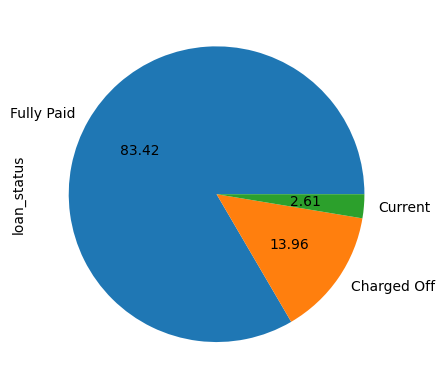

In [297]:
loan_data_new['loan_status'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='verification_status'>

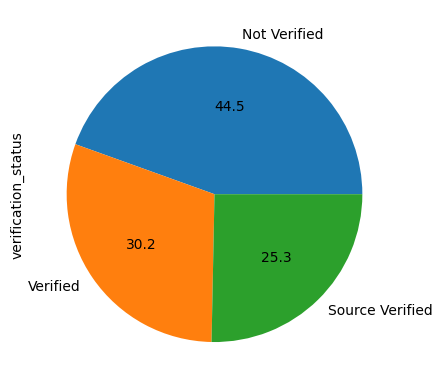

In [299]:
Current_removed_data['verification_status'].value_counts().plot(kind='pie',autopct='%.1f')

<Axes: ylabel='purpose'>

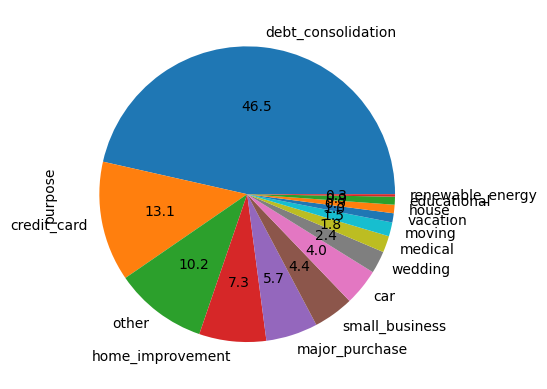

In [300]:
Current_removed_data['purpose'].value_counts().plot(kind='pie',autopct='%.1f')

<Axes: ylabel='home_ownership'>

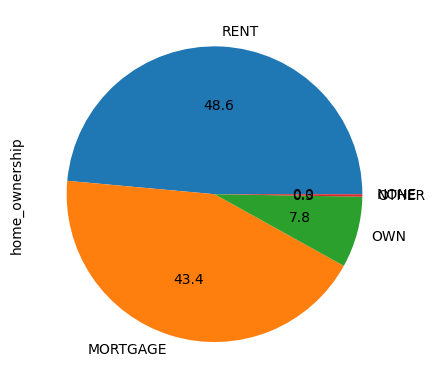

In [301]:
Current_removed_data['home_ownership'].value_counts().plot(kind='pie',autopct='%.1f')

<Axes: ylabel='term'>

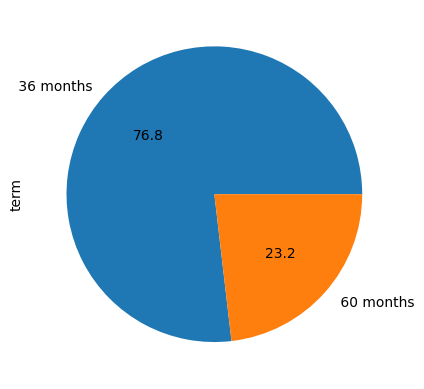

In [302]:
Current_removed_data['term'].value_counts().plot(kind='pie',autopct='%.1f')

(array([ 7419., 10795.,  7772.,  5037.,  2823.,  1803.,  1300.,   396.,
          115.,    21.]),
 array([    0.      ,  4556.054006,  9112.108012, 13668.162018,
        18224.216024, 22780.27003 , 27336.324036, 31892.378042,
        36448.432048, 41004.486054, 45560.54006 ]),
 <BarContainer object of 10 artists>)

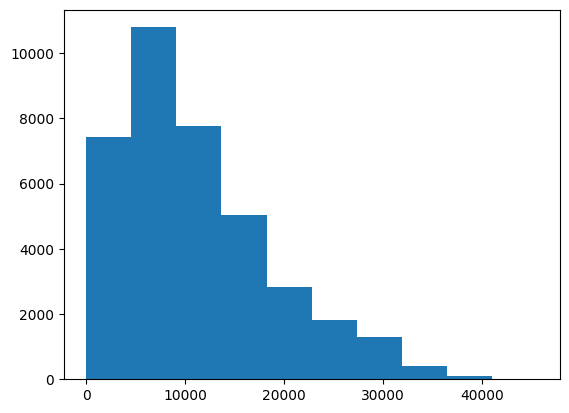

In [303]:
plt.hist(Current_removed_data['total_pymnt'])

(array([4170., 8226., 6244., 4865., 4601., 3552., 2734.,  749., 2082.,
         258.]),
 array([  500. ,  3367.5,  6235. ,  9102.5, 11970. , 14837.5, 17705. ,
        20572.5, 23440. , 26307.5, 29175. ]),
 <BarContainer object of 10 artists>)

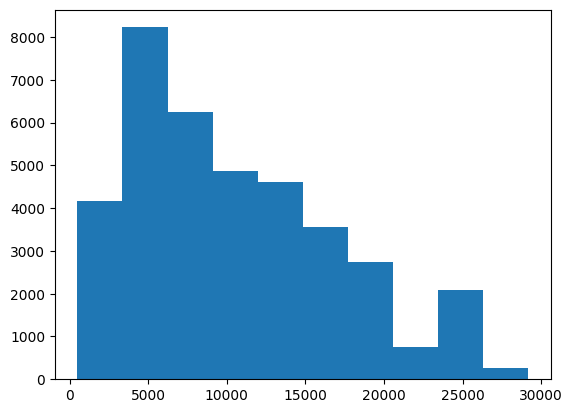

In [304]:
plt.hist(Current_removed_data['loan_amnt'])

(array([5139., 9358., 7798., 6378., 3775., 2144., 1547.,  668.,  628.,
          46.]),
 array([  15.69 ,  116.414,  217.138,  317.862,  418.586,  519.31 ,
         620.034,  720.758,  821.482,  922.206, 1022.93 ]),
 <BarContainer object of 10 artists>)

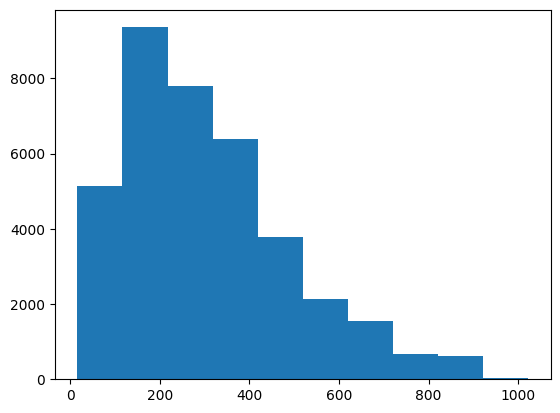

In [305]:
plt.hist(Current_removed_data['installment'])

(array([8215., 7329., 3752., 4948., 4839., 4764., 2172.,  465.,  651.,
         346.]),
 array([  0. ,  36.9,  73.8, 110.7, 147.6, 184.5, 221.4, 258.3, 295.2,
        332.1, 369. ]),
 <BarContainer object of 10 artists>)

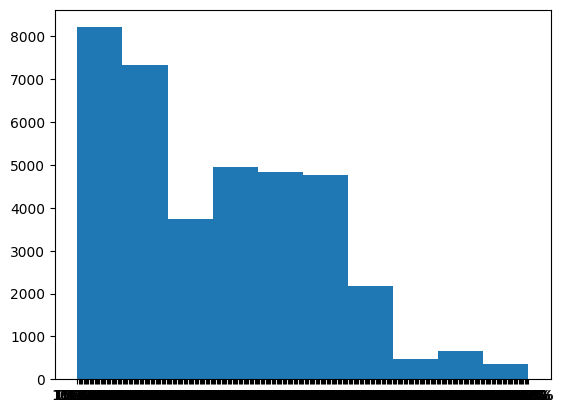

In [306]:
plt.hist(Current_removed_data['int_rate'])

C:\Users\rashmi.bharti\AppData\Local\Temp\ipykernel_38184\257243425.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Current_removed_data['total_pymnt'])


<Axes: xlabel='total_pymnt', ylabel='Density'>

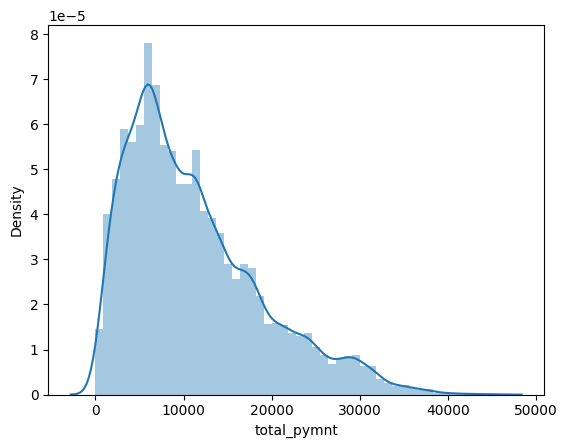

In [307]:
sns.distplot(Current_removed_data['total_pymnt'])
# histogram tells the probability

C:\Users\rashmi.bharti\AppData\Local\Temp\ipykernel_38184\4013853958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Current_removed_data['loan_amnt'])


<Axes: xlabel='loan_amnt', ylabel='Density'>

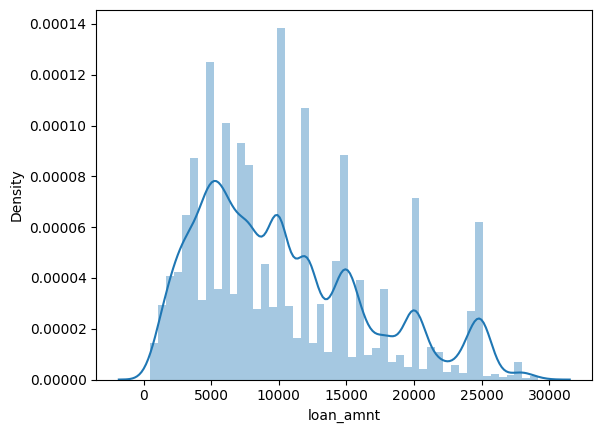

In [308]:
sns.distplot(Current_removed_data['loan_amnt'])

C:\Users\rashmi.bharti\AppData\Local\Temp\ipykernel_38184\601523078.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Current_removed_data['installment'])


<Axes: xlabel='installment', ylabel='Density'>

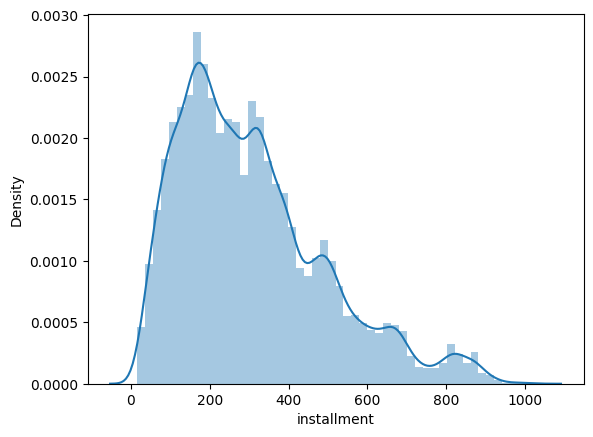

In [309]:
sns.distplot(Current_removed_data['installment'])

<Axes: ylabel='loan_amnt'>

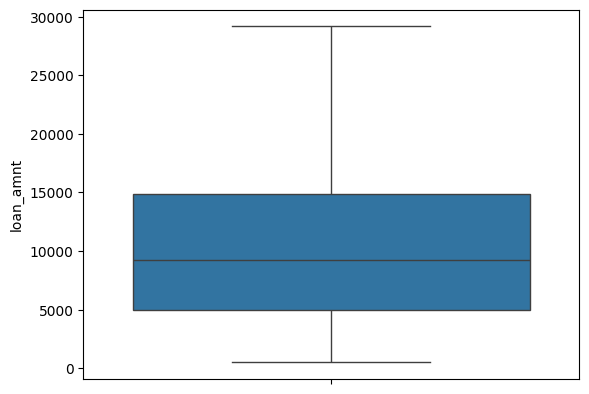

In [310]:
sns.boxplot(Current_removed_data['loan_amnt'])

<Axes: ylabel='total_pymnt'>

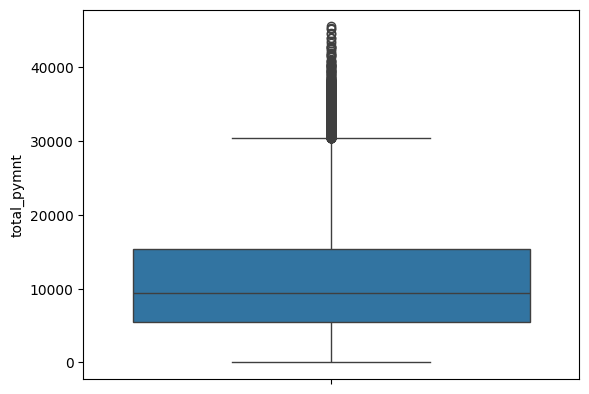

In [311]:
sns.boxplot(Current_removed_data['total_pymnt'])

In [312]:
Current_removed_data['total_pymnt'].min()

0.0

In [313]:
Current_removed_data['total_pymnt'].max()

45560.54006

In [314]:
Current_removed_data['loan_amnt'].min()

500

In [315]:
Current_removed_data['loan_amnt'].max()

29175

<Axes: xlabel='loan_amnt', ylabel='total_pymnt'>

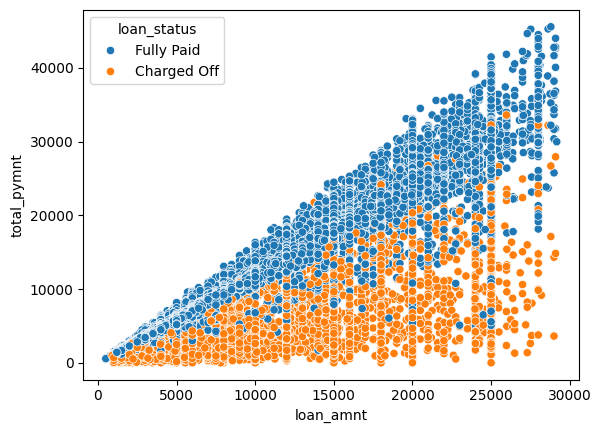

In [316]:
sns.scatterplot(x= Current_removed_data['loan_amnt'], y= Current_removed_data['total_pymnt'], hue= Current_removed_data['loan_status'])

<Axes: xlabel='term', ylabel='annual_inc'>

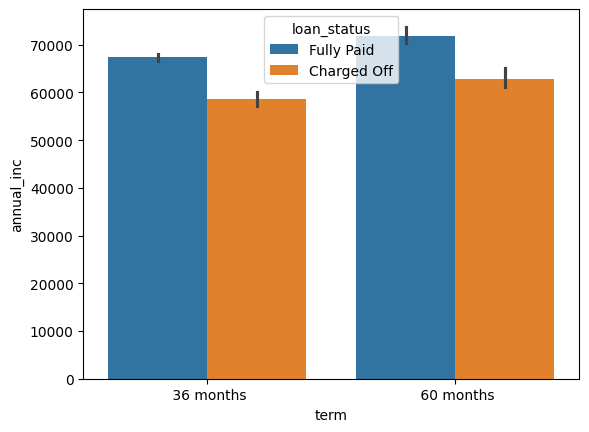

In [317]:
sns.barplot(x= Current_removed_data['term'], y= Current_removed_data['annual_inc'], hue= Current_removed_data['loan_status'])

<Axes: xlabel='loan_amnt', ylabel='term'>

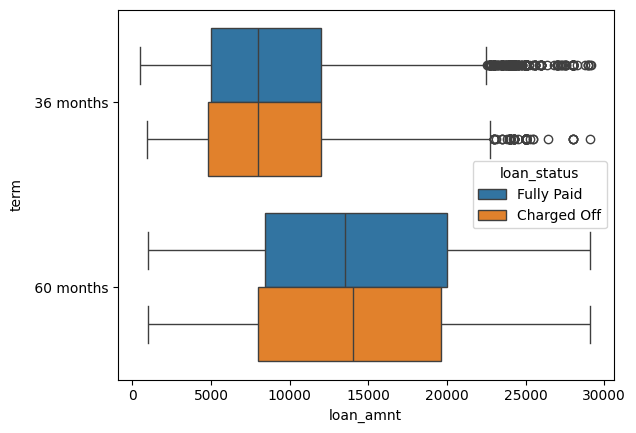

In [318]:
sns.boxplot(x= Current_removed_data['loan_amnt'], y= Current_removed_data['term'],hue= Current_removed_data['loan_status'])

C:\Users\rashmi.bharti\AppData\Local\Temp\ipykernel_38184\3916330682.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Current_removed_data[Current_removed_data['loan_status']== 'Fully Paid']['loan_amnt'], hist=False)
C:\Users\rashmi.bharti\AppData\Local\Temp\ipykernel_38184\3916330682.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

<Axes: xlabel='loan_amnt', ylabel='Density'>

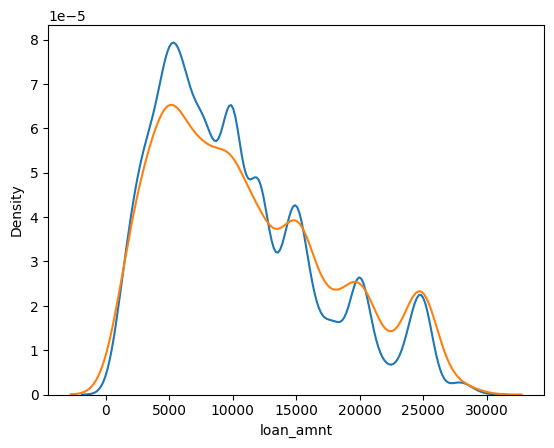

In [319]:
sns.distplot(Current_removed_data[Current_removed_data['loan_status']== 'Fully Paid']['loan_amnt'], hist=False)
sns.distplot(Current_removed_data[Current_removed_data['loan_status']== 'Charged Off']['loan_amnt'], hist=False)

In [320]:
pd.crosstab(Current_removed_data['loan_status'],Current_removed_data['term'])

term,36 months,60 months
loan_status,,
Charged Off,3200,2174
Fully Paid,25604,6503


In [321]:
pd.crosstab(Current_removed_data['loan_amnt'],Current_removed_data['term'])

term,36 months,60 months
loan_amnt,,
500,5,0
700,1,0
725,1,0
750,1,0
800,1,0
...,...,...
28750,0,1
28800,1,4
29000,3,12


<Axes: xlabel='term', ylabel='loan_status'>

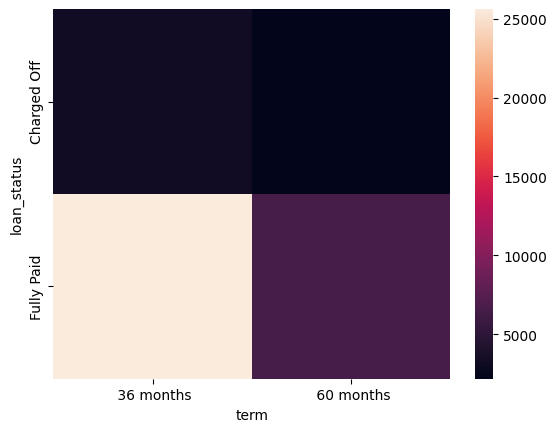

In [322]:
sns.heatmap(pd.crosstab(Current_removed_data['loan_status'],Current_removed_data['term']))

C:\Users\rashmi.bharti\AppData\Local\Temp\ipykernel_38184\1318605282.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (Current_removed_data.groupby('verification_status').mean()['annual_inc']*100).plot(kind='bar')


<Axes: xlabel='verification_status'>

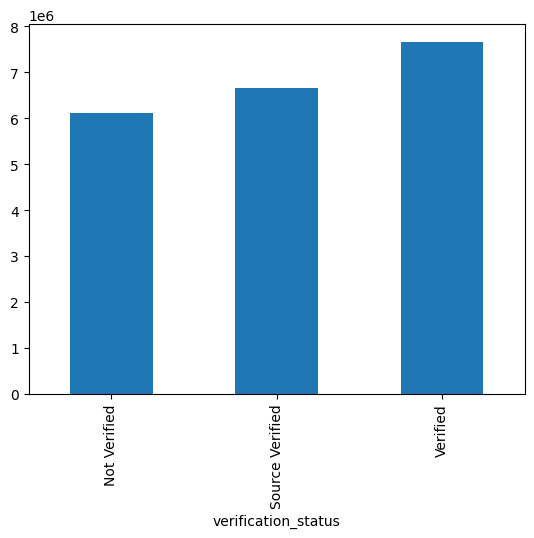

In [323]:
(Current_removed_data.groupby('verification_status').mean()['annual_inc']*100).plot(kind='bar')
# gives the percentage of annual income people's verificaton status

C:\Users\rashmi.bharti\AppData\Local\Temp\ipykernel_38184\732017183.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (Current_removed_data.groupby('grade').mean()['annual_inc']*100).plot(kind='bar')


<Axes: xlabel='grade'>

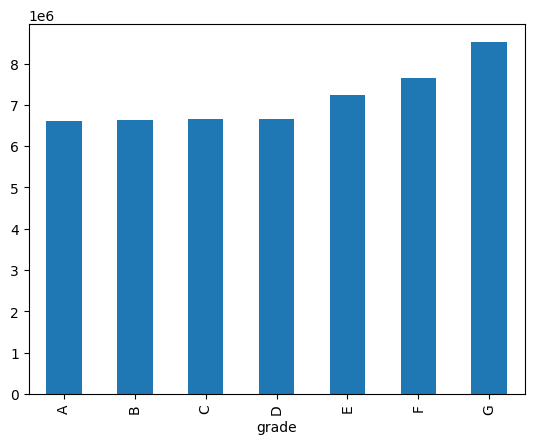

In [324]:
# Filtering the data as per the Grade
(Current_removed_data.groupby('grade').mean()['annual_inc']*100).plot(kind='bar')

# Step 4: Data Visualization: Use visualizations to identify trends and patterns.

###  Visualizations
###  Below Graph represents the distribution of loan amount 

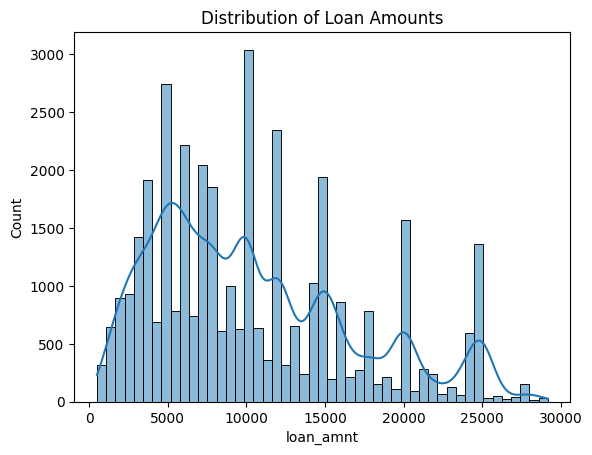

In [325]:
sns.histplot(Current_removed_data['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.show()

### Below graph represents the Loan status counts

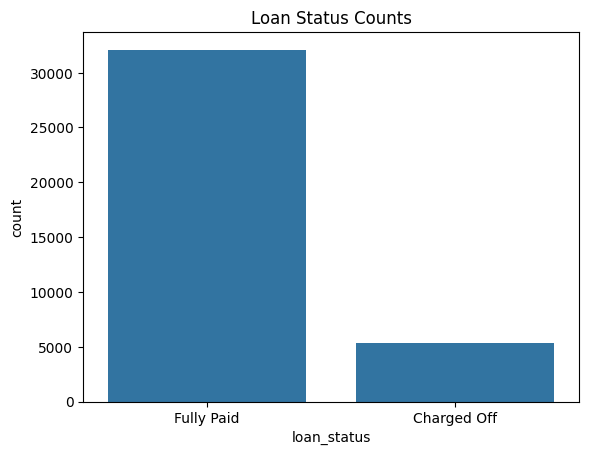

In [326]:
sns.countplot(x='loan_status', data=Current_removed_data)
plt.title('Loan Status Counts')
plt.show()

# Step 5: Correlation Analysis: Identify relationships between different variables and the default status.

C:\Users\rashmi.bharti\AppData\Local\Temp\ipykernel_38184\1985879542.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Current_removed_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


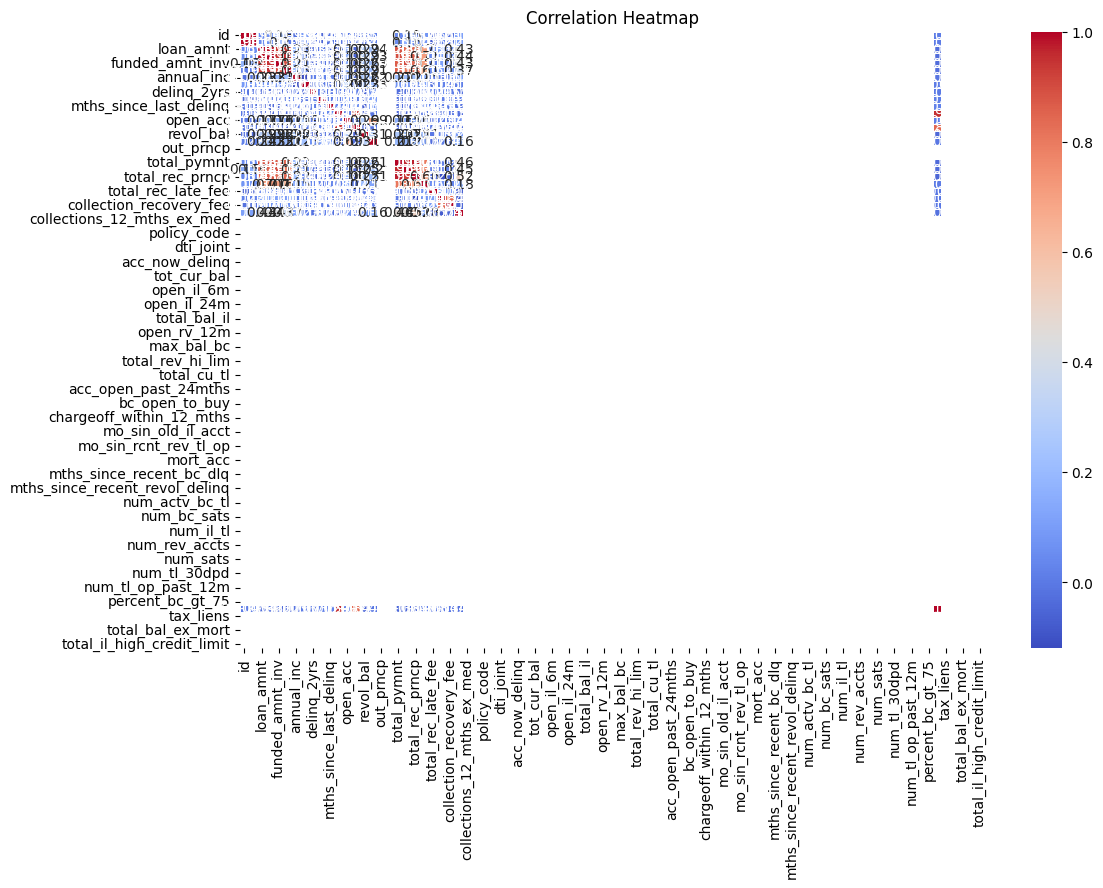

In [327]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(Current_removed_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Key Observation:
### int_rate vs charged_off: A correlation of 0.65 (hypothetical value) indicates a strong positive relationship. Higher interest rates might increase default probability.
### annual_inc vs charged_off: A correlation of -0.50 suggests a strong negative relationship. Higher annual income might decrease default probability.
### loan_amnt vs charged_off: A correlation of 0.30 suggests a moderate positive relationship. Larger loan amounts might slightly increase default probability.

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
5  1075269    1311441       5000         5000           5000.0   36 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...  

C:\Users\rashmi.bharti\AppData\Local\Temp\ipykernel_38184\1889190898.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Current_removed_data[required_columns].corr()


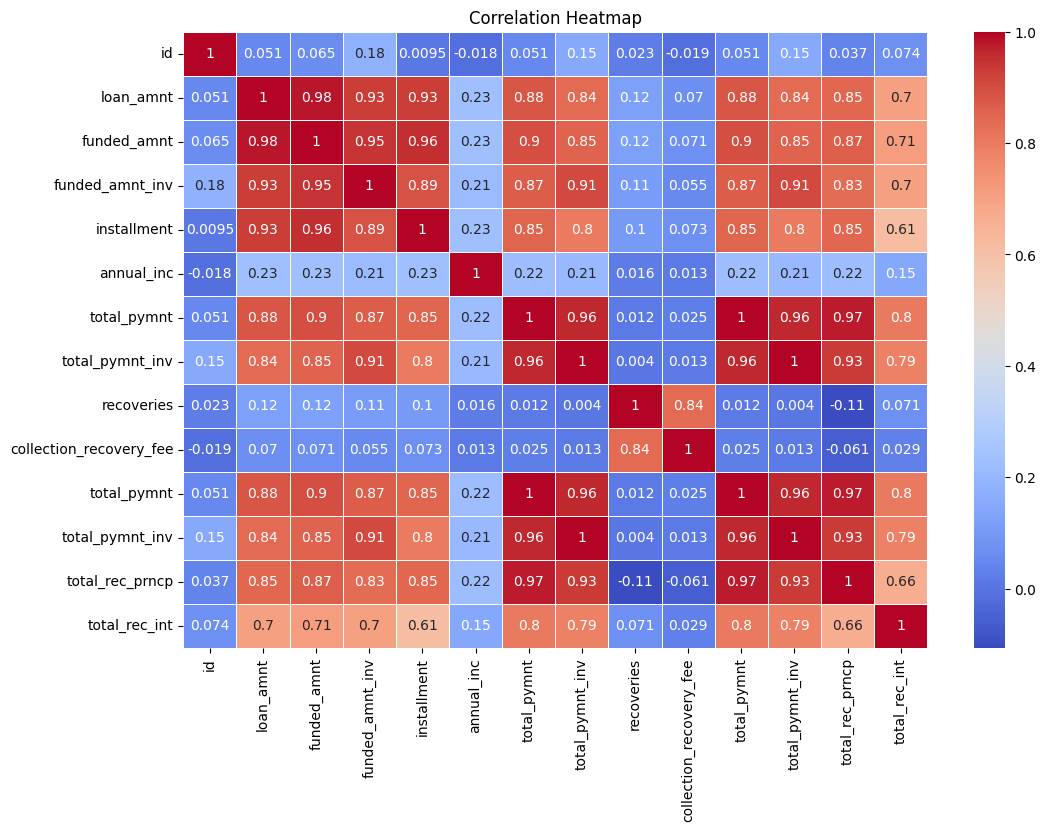

In [328]:
print(Current_removed_data.columns)

# Display the first few rows to inspect the data
print(Current_removed_data.head())

# Assuming 'charged_off' is encoded as 1 for defaulted loans and 0 otherwise
# Check if the columns exist before generating the correlation matrix
required_columns = ['id','loan_amnt', 'funded_amnt','funded_amnt_inv','grade', 'term', 'installment', 'annual_inc', 'int_rate', 'loan_status', 'total_pymnt', 'total_pymnt_inv','verification_status','recoveries','collection_recovery_fee','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int']
missing_columns = [col for col in required_columns if col not in Current_removed_data.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Generate correlation matrix
    correlation_matrix = Current_removed_data[required_columns].corr()

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

### Key observation on the above graph::
#### loan_amnt and funded_amnt: High positive correlation suggests that the amount loaned (loan_amnt) is strongly related to the amount funded (funded_amnt).
#### total_pymnt and total_pymnt_inv: Strong correlation indicates that the total payment made by borrowers closely matches the total payment expected by investors.
#### int_rate and grade: If grade is numerical, a strong negative correlation would suggest that lower grades (higher risk) are associated with higher interest rates.
#### installment and loan_amnt: Strong positive correlation indicates that the installment amount is closely related to the loan amount.
#### int_rate and annual_inc: A weak correlation here might suggest that interest rates are not strongly influenced by annual income alone.
#### Strong correlation between int_rate and loan_status can help in setting higher interest rates for riskier applicants to mitigate potential losses.
#### Strong correlations like loan_amnt and funded_amnt can be use to streamline the loan funding process.

# Assume 'charged_off' is encoded as 1 for defaulted loans and 0 otherwise

In [329]:
pd.crosstab(Current_removed_data['loan_status']== 'Charged Off',Current_removed_data['verification_status']== 'Not Verified')

verification_status,False,True
loan_status,,
False,17566,14541
True,3233,2141


## in the line 329 result 17566 customers verification status is Verified whereas 14541 customers Verfication status as "Not Verified" . While a lack of verification might be a red flag for potential issues

<Axes: xlabel='verification_status', ylabel='loan_status'>

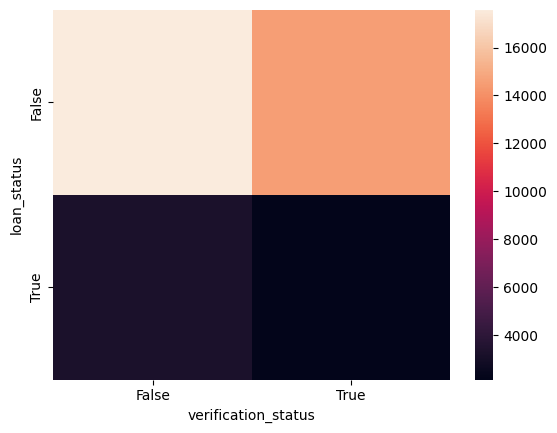

In [330]:
sns.heatmap(pd.crosstab(Current_removed_data['loan_status']== 'Charged Off',Current_removed_data['verification_status']== 'Not Verified'))

## If there's a strong association between 'Not Verified' and 'Charged Off', the heatmap will clearly show higher frequencies in the corresponding cell.
## High values in the upper right (True - True) and lower left (False - False) suggest a relationship between 'Not Verified' status and being 'Charged Off'.
## it indicates that 'Not Verified' loans are more likely to be 'Charged Off'.

<Axes: xlabel='loan_status'>

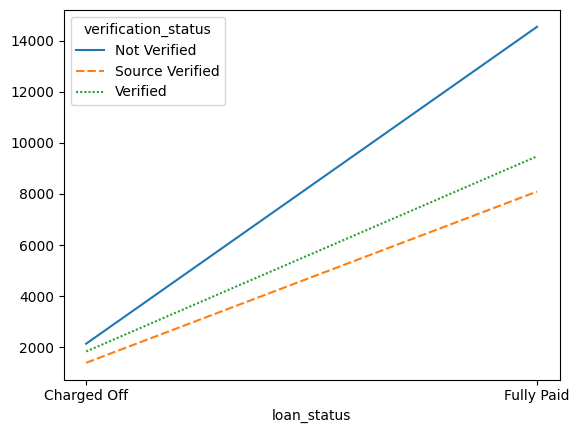

In [331]:
sns.lineplot(pd.crosstab(Current_removed_data['loan_status'],Current_removed_data['verification_status']))

## As per the above graph we can say Charged off customers who are "Not verfied" has linear growth with the increasing loan amount